In [1]:
from IPython.display import display, HTML
from zlib import crc32
import pandas as pd
import numpy as np

In [2]:
def generate_task(code):
    rs = np.random.RandomState(code)
    tasks = pd.read_csv(
        'https://drive.google.com/uc?id=1g-AK3C74K-myj8zKbxk69zXO00roTKh-')

    type_to_id = dict()
    for i in range(len(tasks)):
        _type = tasks.loc[i]['code'].split('_')[0]
        if _type not in type_to_id:
            type_to_id[_type] = []
        type_to_id[_type].append(i)

    list_of_task_id = [rs.choice(type_to_id[_type]) for _type in type_to_id]

    return [{'task': tasks.loc[_loc]['task'],
             'data': tasks.loc[_loc]['data']} 
            for _loc in list_of_task_id]

In [3]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
task['id'] = crc32(task['mail'].encode('utf-8'))
task['tasks'] = generate_task(task['id'])

task

Enter your mail: puchkov.k@phystech.edu


{'id': 3366284282,
 'mail': 'puchkov.k@phystech.edu',
 'tasks': [{'data': '1F_FUZ7iUBKeMOhoMhvqjc5Nl7K4g5iE7',
   'task': 'Рассмотрим выборку зависимости числа поломок телефонов (среди всех тестовых образцов, в выборке указано сломался телефон или нет) для пары брендов телефонов (brand-1; brand-2) среди дешевых и дорогих телефонов (high price; low price). Есть ли связь между поломками и ценовым сегментом. Есть ли замечания по данным?'},
  {'data': '1-6J8Jd6yG4ztDL32SIH99rNH4CK9hKw5',
   'task': 'Задана выборка курса обмена иностранной валюты в зависимости от двух переменных: ВВП страны и популярности зеленых гавайских галстуков. Определить, значимы ли эти признаки и их межфакторное взаимодействие для  построения линейное регрессии.'},
  {'data': '1p7gTT3ZfmTIwJg1Tfd8Nflojy1alsfks=',
   'task': 'Рассмотрим задачу аппроксимации уровня продаж мандарин за последние 10 лет. Постройте модель, которая аппроксимирует данный временной ряд при помощи ARIMA. Подберите оптимальные параметры.'}]}

# Задача №1

In [4]:
task_numder = 1
if task['tasks'][task_numder-1]['data'] != '-':
    dataset1 = pd.read_csv(
        'https://drive.google.com/uc?id={}'.format(
            task['tasks'][task_numder-1]['data']))
    print('dataset loaded')
else:
    dataset1 = pd.DataFrame(['not', 'required'])
    print('dataset is not required')
display(HTML('<h3>'+task['tasks'][task_numder-1]['task']+'</h3>'))

dataset loaded


## Решение задачи

In [ ]:
dataset1.sample(5)

,price,brand,is_broken
455,high,1,yes
1686,low,1,yes
457,high,1,yes
1028,high,1,no
3319,high,2,no


In [ ]:
dataset1.describe(include='all')

,price,brand,is_broken
count,4140,4140.000000,4140
unique,2,NaN,2
top,high,NaN,no
freq,3000,NaN,2095
mean,NaN,1.502415,NaN
std,NaN,0.500055,NaN
min,NaN,1.000000,NaN
25%,NaN,1.000000,NaN
50%,NaN,2.000000,NaN
75%,NaN,2.000000,NaN


In [ ]:
import scipy.stats as st

price = dataset1['price'].copy()
price[price == "high"] = 1
price[price == "low"] = 0

broken = dataset1['is_broken'].copy()
broken[broken == "yes"] = 0
broken[broken == "no"] = 1

dataset1['price'] = price
dataset1['is_broken'] = broken

dataset1.sample(5)

,price,brand,is_broken
2580,1,2,0
689,1,1,0
493,1,1,0
430,1,1,0
1052,1,1,1


In [ ]:
st.pearsonr(dataset1['price'] , dataset1['is_broken'])

(-0.008777837860702256, 0.572324592139672)

In [ ]:
# В случае корреляции Спирмана удаcтся избежать ошибки, связанной с выбросами
st.spearmanr(price, broken)

SpearmanrResult(correlation=-0.008777837860701927, pvalue=0.5723245921415436)

In [ ]:
# Аналогично про корреляцию Кендалла
# Точнее оценивается по выборке небольших объемов

st.kendalltau(price, broken)

KendalltauResult(correlation=-0.008777837860701923, pvalue=0.5722623718795733)

**Следовательно, везде данные не противоречат гипотезе о некорреляции. Да и само значение везде близко к нулю.**

# Задача №2

In [ ]:
task_numder = 2
if task['tasks'][task_numder-1]['data'] != '-':
    dataset2 = pd.read_csv(
        'https://drive.google.com/uc?id={}'.format(
            task['tasks'][task_numder-1]['data']))
    print('dataset loaded')
else:
    dataset2 = pd.DataFrame(['not', 'required'])
    print('dataset is not required')
display(HTML('<h3>'+task['tasks'][task_numder-1]['task']+'</h3>'))

dataset loaded


## Решение задачи

In [ ]:
dataset2.sample(5)

,# money,gdp,tie
33,775.4200,861.5700,149.0
7,7.6483,8.4979,615.0
79,500.0600,555.6100,595.0
95,630.1700,700.1900,10.0
58,295.9200,328.8000,93.0


In [ ]:
dataset2.columns = ["money", "gdp", "tie"]
X = dataset2.drop('money', axis=1)
y = dataset2['money']
X

,gdp,tie
0,441.28,550.0
1,734.21,836.0
2,555.99,879.0
3,845.78,632.0
4,909.28,563.0
...,...,...
95,700.19,10.0
96,330.24,639.0
97,917.68,120.0
98,197.85,414.0


In [ ]:
import statsmodels.api as sm

model2 = sm.OLS.from_formula("money ~ gdp*tie", data=dataset2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  money   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.796e+11
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:44:59   Log-Likelihood:                 418.83
No. Observations:                 100   AIC:                            -829.7
Df Residuals:                      96   BIC:                            -819.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0014      0.001     -1.158      0.250      -0.004       0.001
gdp            0.9000   2.19e-06   4.11e+05      0.000       0.900       0.900
tie         2.972e-06   2.37e-06      1.257      0.212   -1.72e-06    7.67e-06
gdp:tie     4.607e-08   4.11e-09     11.215      0.000    3.79e-08    5.42e-08
==============================================================================
Omnibus:                        0.457   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.607
Skew:                          -0.127   Prob(JB):                        0.738
Kurtosis:                       2.716   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Значит, галстуки неважны, остальное все важно.

# Задача №3

In [52]:
task_numder = 3
if task['tasks'][task_numder-1]['data'] != '-':
    dataset3 = pd.read_csv(
        'https://drive.google.com/uc?id={}'.format(
            task['tasks'][task_numder-1]['data']))
    print('dataset loaded')
else:
    dataset3 = pd.DataFrame(['not', 'required'])
    print('dataset is not required')
display(HTML('<h3>'+task['tasks'][task_numder-1]['task']+'</h3>'))

dataset loaded


## Решение задачи

In [55]:
dataset3.sample(5)

,t,point
126,7.2020,12.819919
104,9.2018,10.229187
21,10.2011,2.071861
127,8.2020,12.287866
125,6.2020,17.329616


In [9]:
!pip install statsmodels==0.12.1

     |████████████████████████████████| 9.5MB 6.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [57]:
data = dataset3['point']

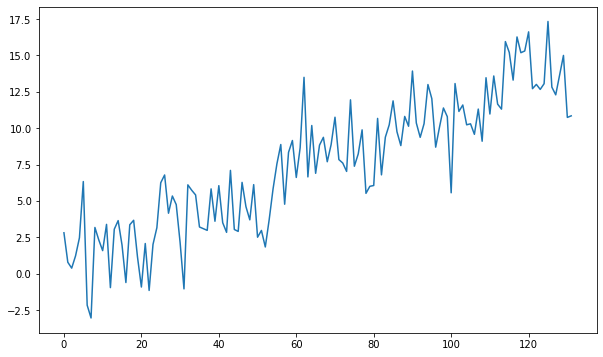

In [58]:
import seaborn as sns
import matplotlib.pylab as plt

plt.figure(figsize = (10,6))
plt.plot(data)
plt.show()

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

stl_data = seasonal_decompose(dataset3['point'])
stl_data.plot()

plt.show()

ValueError: ignored

,t,point
t,,
1970-01-01 00:00:00.000000049,49.0,6.117718
1970-01-01 00:00:00.000000023,23.0,2.011134
1970-01-01 00:00:00.000000128,128.0,13.639404
1970-01-01 00:00:00.000000129,129.0,14.995759
1970-01-01 00:00:00.000000002,2.0,0.380522


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


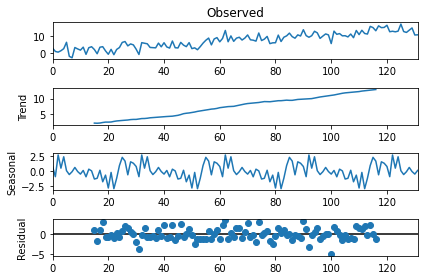

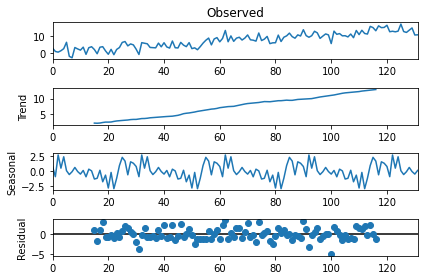

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

stl_data = seasonal_decompose(dataset3['point'].values, freq=30)
stl_data.plot()

In [65]:
stl_data.trend

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
127   NaN
128   NaN
129   NaN
130   NaN
131   NaN
Name: trend, Length: 132, dtype: float64

In [60]:
from statsmodels.tsa.stattools import kpss

kpss(data, nlags="legacy")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1882: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


(1.0005841771931219,
 0.01,
 13,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

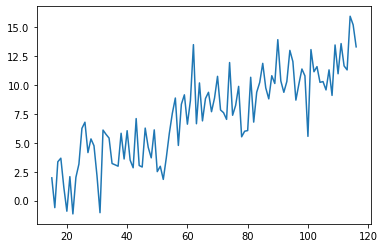

In [68]:
new_data_without_trend = dataset3.copy()[15:-15]
new_data_without_trend['t'] = (dataset3['t'] - stl_data.trend)[15:-15]
plt.plot(new_data_without_trend['point'])

plt.show()

In [69]:
kpss(new_data_without_trend['point'], nlags="legacy")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1882: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


(0.8316041071272807,
 0.01,
 13,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

Ряд нестационарен. Проведём дифференцирование:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1886: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


(0.045012059986617045,
 0.1,
 13,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

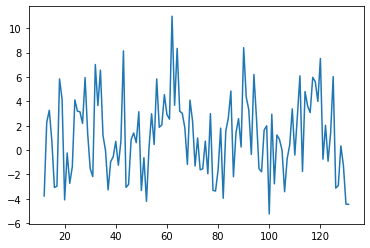

In [70]:
diff_ts = dataset3['point'].diff(12)[12:]
plt.plot(diff_ts)
kpss(diff_ts)

Для полученного ряда гипотеза стационарности не отвергается

Посмотрим на ACF и PACF полученного продифференцированного ряда:

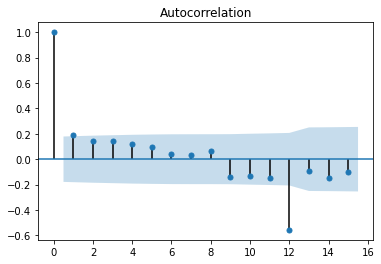

In [71]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(diff_ts, lags=15)
plt.show()

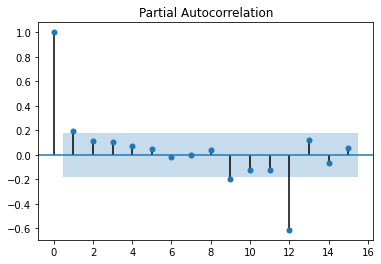

In [72]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(diff_ts, lags=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1886: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


(0.15336978903101334,
 0.1,
 13,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

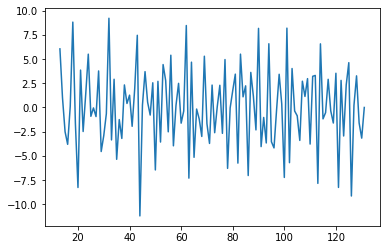

In [73]:
diff_diff_ts = diff_ts.diff(1)[1:]
plt.plot(diff_diff_ts)
kpss(diff_diff_ts)

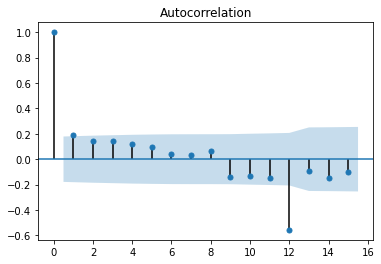

In [74]:
plot_acf(diff_ts, lags=15)
plt.show()

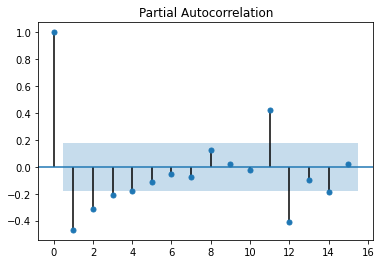

In [75]:
plot_pacf(diff_diff_ts, lags=15)
plt.show()

На ACF значимы лаг 12, на PACF — 1-3. Будем искать модель, оптимальную по AICc, в окрестности ARIMA(3,1,1).

**Не очень понятно, что делать с 11 и 12 на PACF? И на предыдущем дифференцировании так-то только 12 было — что это значит?**

In [78]:
from statsmodels.tsa.arima_model import ARIMA

for i in range(-3,2):
    for k in range(-1, 2):
      for p in range(-1, 2):
        order = (3+i,1+k,1+p)
        try:
            arima = ARIMA(dataset3['point'].values, order=order).fit()
            print(arima.aic)
        except:
            pass

780.0054352921779
712.0049508239454
687.6567982546605
644.3561163438171
581.0407497444336
580.4240338906538
777.0807183748182
647.3345834832905
591.0140606269365
639.3382664895498
596.5770755261924
619.3360505832305
580.4552224219631
582.3831211905402
718.7690114657121
621.8979293680804
664.4951472566268
600.7160786874391
582.4552100246675
583.743434465266
681.1297154544063
606.8564934616065
593.5009258097136
582.2993507231674
585.713056959437
654.8447328332743
598.6830322744354
601.2708249020139
593.2199204277905
583.0140724844532
585.0917546009863
641.8510121686835
598.6555868340655


Нулевая апроксимирует лучшего всего?

In [79]:
for i in range(-1,2):
    for k in range(-1, 2):
        order = (3+i,1,1+k)
        try:
            arima = ARIMA(dataset3['point'].values, order=order).fit()
            print(arima.aic)
        except:
            pass

600.7160786874391
582.4552100246675
583.743434465266
593.5009258097136
582.2993507231674
585.713056959437
593.2199204277905
583.0140724844532
585.0917546009863


Если делать как на семинаре, то все равно получается минимальная степень (2, 1, 0)

In [ ]:
arima = ARIMA(dataset3['point'].values, order=(2,1,0)).fit()
print(arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  131
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -296.358
Method:                       css-mle   S.D. of innovations              2.319
Date:                Tue, 27 Apr 2021   AIC                            600.716
Time:                        18:59:11   BIC                            612.217
Sample:                             1   HQIC                           605.389
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0763      0.103      0.743      0.459      -0.125       0.278
ar.L1.D.y     -0.5992      0.081     -7.414      0.000      -0.758      -0.441
ar.L2.D.y     -0.3841      0.081     -4.741      0.0

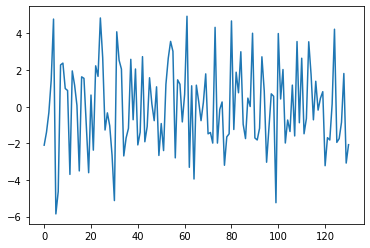

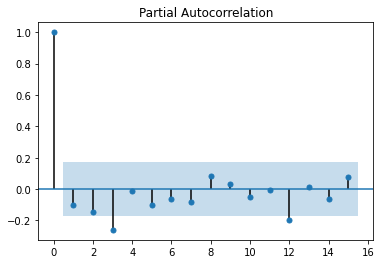

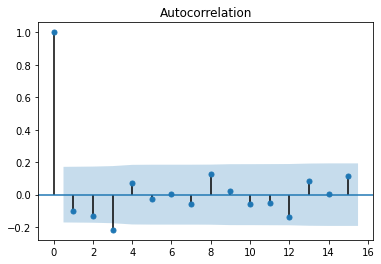

In [ ]:
plt.plot(arima.resid)
plot_pacf(arima.resid, lags=15)
plot_acf(arima.resid, lags=15)

plt.show()

In [80]:
for i in range(-1,2):
    for k in range(-1, 2):
        order = (3+i,1,1+k)
        try:
            arima = ARIMA(dataset3['point'].values, order=order, seasonal_order=(1, 1, 1, 12)).fit()
            print(arima.aic)
        except:
            pass

Ничего? 